#Handwriting Recognition Software

Prepared by 
Group 10
Michelle Cheng 100696572
Evans Mosomi 100719552
Martins Babajide 100709716
Haider Sarmad 100622306

Prepared for 
SOFE 3720 Winter 2021
Artificial Intelligence



In [1]:
!pip install Keras

In [2]:
!pip install tensorflow

In [3]:
!pip install opencv-python

from tkinter import * 
import PIL 
from PIL import Image, ImageDraw 
import tensorflow as tf
import cv2

In [134]:
from tkinter import *
import PIL
from PIL import Image, ImageDraw
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
import numpy as np

In [135]:
mnist = tf.keras.datasets.mnist 
#contains handwritten characters 
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

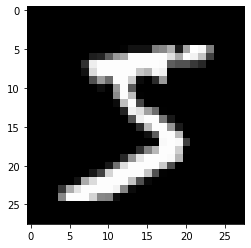

5


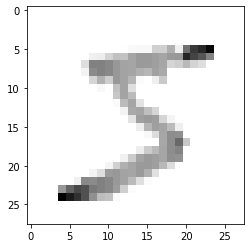

In [136]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap="gray")
plt.show() #used to execute the graph
#plotting the graph
plt.imshow(x_train[0], cmap = plt.cm.binary)
#normalizing the data 
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)
print (y_train[0])

In [138]:

IMG_SIZE=28
x_train= np.array(x_train).reshape(60000, IMG_SIZE, IMG_SIZE,1)
x_test= np.array(x_test).reshape(10000, IMG_SIZE, IMG_SIZE,1)

print ("training dimension: {}".format(x_train.shape))
print ("training dimension: {}".format(y_train.shape))
print ("training dimension: {}".format(x_test.shape))
print ("training dimension: {}".format(y_test.shape))

training dimension: (60000, 28, 28, 1)
training dimension: (60000,)
training dimension: (10000, 28, 28, 1)
training dimension: (10000,)


In [139]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [140]:
model = Sequential()

#first convolution layer
model.add(Conv2D(32, (3,3), input_shape = (28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#connected layer for 2 
model.add (Flatten())

#last fully connected layer 
model.add(Dense(10))
model.add(Activation('softmax'))


In [141]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_19 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)             

In [142]:
print ("Total Training Samples = ",len(x_train))

Total Training Samples =  60000


In [143]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [144]:
#training model 
model.fit(x_train,y_train,epochs=5, validation_data= (x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4268 - accuracy: 0.8717 - val_loss: 0.0703 - val_accuracy: 0.9755
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0702 - accuracy: 0.9780 - val_loss: 0.0476 - val_accuracy: 0.9842
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0493 - accuracy: 0.9860 - val_loss: 0.0462 - val_accuracy: 0.9847
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0356 - val_accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0295 - accuracy: 0.9914 - val_loss: 0.0331 - val_accuracy: 0.9893


In [145]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss on test samples", test_loss)
print ("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0331 - accuracy: 0.9893
Test loss on test samples 0.03310098499059677
Validation Accuracy on 10,000 test samples 0.989300012588501


Prediction (softmax):
[[9.9892247e-01 1.0981596e-10 2.3242690e-05 8.5238480e-07 2.1810767e-12
  3.2216343e-04 1.1559462e-05 1.6736378e-10 5.1839593e-06 7.1462413e-04]]
Prediction (hardmax):
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


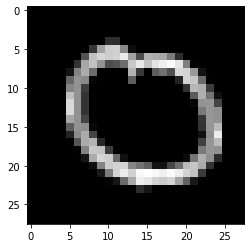

Final output: 0


In [154]:
example=x_train[108]
prediction = model.predict(example.reshape(1,28,28,1))
print ("Prediction (softmax):\n{}".format(prediction))

hard_prediction = np.zeros(prediction.shape)
hard_prediction[0][np.argmax(prediction)] = 1
print ("Prediction (hardmax):\n{}".format(hard_prediction))

plt.imshow(example.reshape(28,28),cmap="gray")
plt.show()

print("Final output: {}".format(np.argmax(prediction)))

Image file loaded.


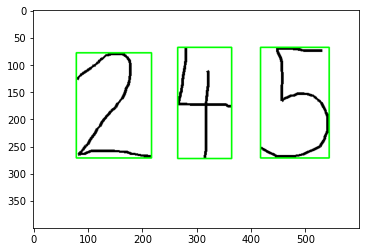

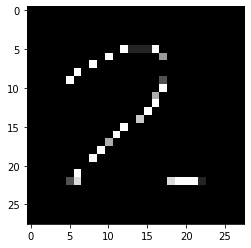

Current predictions: ['2']


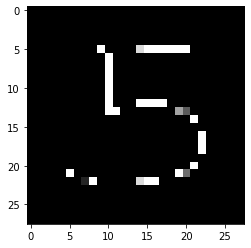

Current predictions: ['2', '5']


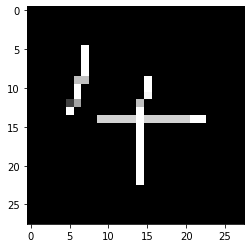

Current predictions: ['2', '5', '4']


In [185]:
global predictions
global padded 
global counter
predictions = []
padded=[]

image1=PIL.Image.new('RGB',(600,400),'white')
draw=ImageDraw.Draw(image1)

def detection(img_num): 
    global predictions 
    global padded
    global counter 
    
    counter=0
    #load image file 
    filename=f'image_{img_num}.png'
    img=cv2.imread(filename)
    print("Image file loaded.")
    plt.imshow(img)
    
    #Pad the digits in the image and load into list 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh=cv2.threshold(gray.copy(),28,28,cv2.THRESH_BINARY_INV)
    contours,_=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        x,y,w,h=cv2.boundingRect(c)
        cv2.rectangle(img,(x,y),(x+w,y+h),color=(0,255,0),thickness=2)
        digit=thresh[y:y+h,x:x+w]
        resized_digit=cv2.resize(digit,(18,18))
        padded_digit=np.pad(resized_digit,((5,5),(5,5)),"constant",constant_values=0)
        padded.append(padded_digit)
    plt.imshow(img,cmap="gray")
    plt.show()
    inp=np.array(padded)
    
    #pre process each image in list for classification 
    for digit in padded:
        counter=counter+1
        detected = model.predict(digit.reshape(1,28,28,1))
        o.insert(END,(str(np.argmax(detected))))
        plt.imshow(digit.reshape(28,28),cmap="gray")
        plt.show()
        predictions.append(format(np.argmax(detected)))
        print("Current predictions: {}".format(predictions))
    
def paint(event):
    global lastx, lasty
    x, y = event.x, event.y
    c.create_line((lastx, lasty, x, y), fill='black',width=5)
    draw.line((lastx, lasty, x, y), fill='black', width=5)
    lastx, lasty = x, y

def activate(event):
    global lastx, lasty
    c.bind('<B1-Motion>',paint)
    lastx,lasty=event.x,event.y
    
def save():
    global img_num 
    filename=f'image_{img_num}.png'
    image1.save(filename)
    detection(img_num)
    img_num +=1

def clear():
    global padded
    padded.clear()
    c.delete(ALL)
    o.delete("1.0","end")
    draw.rectangle((0, 0, 600, 400), fill="white")
    
def incorrect():
    global counter 
    global predictions 
    global padded
    
    predictions=predictions[:len(predictions)-counter]
    print("Revised predictions: {}".format(predictions))
    
    c.delete(ALL)
    o.delete("1.0","end")
    draw.rectangle((0, 0, 600, 400), fill="white")
    padded.clear()
    counter=0

def result():
    print("Final prediction list: {}".format(predictions))
    o.insert(END,(str(np.argmax(predictions))))
    
window=Tk()
window.title("Handwriting Recognition")
message=Label(window,text='Draw some numbers below')
message.pack(side=TOP)
lastx,lasty=None,None
img_num=0
counter=0

c=Canvas(window,width=600,height=400, bg='white')
c.bind('<1>',activate)
c.pack(expand=YES, fill=BOTH)

message=Label(window,text='Output box:')
message.pack(side=TOP)
o=Text(window,width=20,height=2,bg='light cyan')
o.pack()

button_save=Button(window,text="Save",width=25,command=save)
button_save.pack()

button_clear=Button(window,text="Clear screen",width=25,command=clear)
button_clear.pack()

button_incorrect=Button(window,text="Incorrect",width=25,command=incorrect)
button_incorrect.pack()

button_result=Button(window,text="Final list",width=25,command=result)
button_result.pack()

message=Label(window,text='Click save after your drawing.\n If output is correct, clear screen and draw again. Number(s) will be added to list.\n Otherwise click incorrect if prediction is wrong and number will be erased from list.')
message.pack(side=TOP)
window.mainloop()